# Feed Forward Neural Networks

In this notebook, you will learn to work with simple feed forward neural networks (FFNNs).

![title](assets/feed_forward_NN.jpg)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
cm = plt.cm.gray_r

### Case: automatic mail-delivery

One of the precursors to more advanced networks and tasks is to consider the recognition of handwriting. More specifically, can you train a network to distinguish the digits 0-9? This was one of the earliest practical applications for neural networks, and we will go through it here.

In [48]:
data = datasets.load_digits() 
X = data.images
y = data.target

#### Ex.1: How many images do we have?

#### First we visualize our data

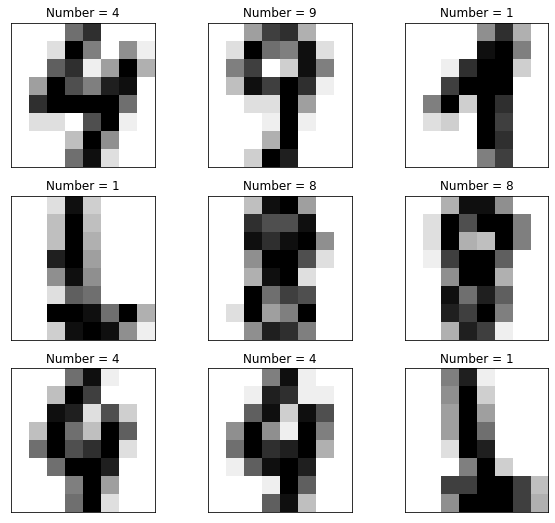

In [49]:
fig = plt.figure(figsize=(10,9))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    i = np.random.randint(0,X.shape[0])
    img = X[i]
    plt.imshow(img, cmap=cm)
    plt.xticks([]); plt.yticks([])
    plt.title(f'Number = {y[i]}')

The resolution here is kept very low as it requires less data resources to work with.

Currently each image is organized into a 8x8 grid. However, the neurons are not aranged spacially in a grid, so we have to 'unroll' the images into a single dimension to match the input layer. This can be achieved using the `reshape` method:

In [50]:
X = X.reshape(1797, 64)
X.shape

(1797, 64)

#### Before training the network, we need to split the data into a training set and a test set. 
It is very important to not evaluate a model on an independent data set (we will see why later). The split is done using `sklearn`'s `train_test_split`.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Creating a machine learning model. 

The convention in python is to treat the model as an object (an instance of a *class*. A class is just a template  of predefined methods used to create an object). 

In [52]:
clf = MLPClassifier(hidden_layer_sizes=(50,50))

When we create the object, we also specify the network architecture (and other *hyperparameters*). This expample has 2 hidden layers, 50 neurons in each layer. Most of the hyperparameters have a behind the scenes default setting. We say that `clf` is an instance of the the object, MLPClassifier. We can check this with the `type` command.

#### Ex.2: What class is `clf` an instance of?

Each machine learning model in scikit-learn has a set of associated methods. The most important ones are `fit` and `predict`. The `fit` method is what actually trains the model. Once trained, `clf.predit()` can be called to make predictions on unseen samples. 

In [53]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Now that the model has been trained, we can try to make a prediction on a few unseen samples. You are encouraged to rerun this very code a few times and confirm that the network indeed has been properly trained with a high accuracy!

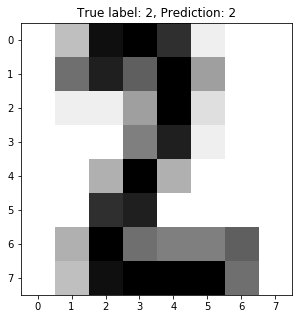

In [54]:
i = np.random.randint(0,10)
img = X_test[i].reshape(8,8) #we need to redo the flatten operation 
pred = clf.predict([X_test[i]])[0]

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=cm)
plt.title(f'True label: {y_test[i]}, Prediction: {pred}')
plt.show()

#### Notice that we make the predictions on `X_test` and not `X_train`.

To get a more proper quantification of the model, we can compute the accuracy: the relationship between the correct predictions and the total number of predictions:

$$ Accuracy = \frac{TP}{TP + FP}$$

In [109]:
accuracy = clf.score(X_test, y_test)

print(f'The model has a test accuracy of {round(accuracy,3)} and a train accuracy of {clf.score(X_train,y_train)}')

The model has a test accuracy of 0.967 and a train accuracy of 1.0


As you can see, the train accuracy is overly optimistic, with a perfect prediction score - this is known as overfitting - the model memorizes specific instances at the cost of generlization. However, the degree of overfitting seen here is not very severe. 

#### Summary so far: with only about 2 lines of code, you can make a neural net, train it on a dataset, and evaluate its performance

### Non-linear seperability
Compared to the perceptron in `1_Introduction_to_Neural_Networks`, this model is able to learn non-linear relationships. If the digit recognition didn't make this point clearly enough, we can demonstrate this ability applied to a synthetic dataset.

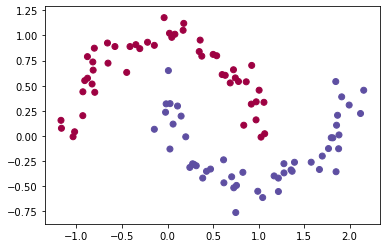

In [101]:
X, y = datasets.make_moons(noise=.1, random_state=1)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.show()

We can train another MLP to distinguish these two crescent moons. Note we ignore splitting the data to a train and test set just for simplicity.

In [102]:
clf2 = MLPClassifier((50,50,50))
clf2.fit(X, y)

C:\Users\Peder\Anaconda3\envs\cbm101\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

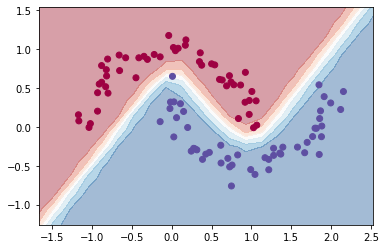

In [108]:
h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = np.array(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

Now we have made it explicit that MLPs can seperate non-linear data, so we can proceed with the MNIST example. 

In principle we could end it at here celebrating a high test accuracy, but it is more interesting to scrutinize the model, seeing *where* it went wrong, how *certain* is it of its own predictions, how much did each epoch of training change the model performance, and other questions. 

In [146]:
X = data.images
y = data.target

In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = clf.predict(X_test)
print(data.target_names)
print(confusion_matrix(y_test, pred))

[0 1 2 3 4 5 6 7 8 9]
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  1  0  0  0  0  0]
 [ 0  1 44  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  1]
 [ 0  0  0  0 49  0  0  0  0  1]
 [ 0  0  0  0  1 53  0  0  0  2]
 [ 0  2  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  2  0  0  0 43]]


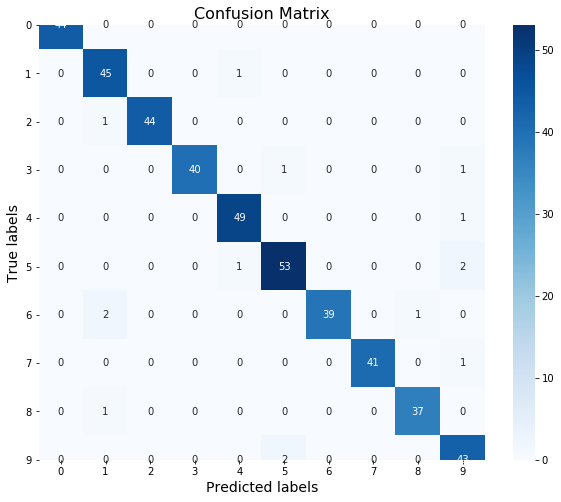

In [150]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion_matrix(y_test, pred), 
            annot = True, 
            fmt = 'g',
            cmap = "Blues",
            ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)
ax.set_title('Confusion Matrix', fontsize = 16) 
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)
plt.yticks(rotation=0) 
plt.show()

#### Ex.3. Certain numbers are sometimes confused with others (e.g. 9 is predicted as 5 twice). We wish to display these wrongly classified examples. Complete the code below to visualize them. 

*Hint: `np.where` gives you the indeces in an array which satisfies a specified condition. Example: if `A = np.array([-1,1,-2,2,-3,3])`, then `np.where(A > 0)` would return the indeces `1,3,5`*

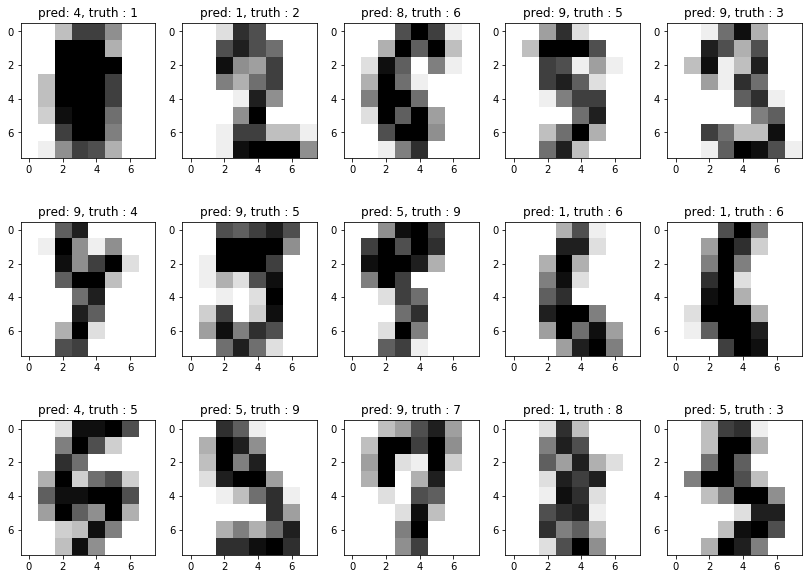

In [177]:
#wrong_pred_idx = ## insert your code here np.where(pred != y_test)

fig = plt.figure(figsize=(14,14))
for (k, i) in enumerate(wrong_pred_idx[0]):
    ax = fig.add_subplot(3,5,k+1)
    img = X_test[i].reshape(8,8)
    plt.imshow(img, cmap=cm)
    plt.title(f"pred: {pred[i]}, truth : {y_test[i]}")

Looking at these examples (especially while considering the low resolution), they are not completely unreasonable mistakes.